# Intro to Kalshi Prediction Market and Estimate the Future of Gas Prices

In [139]:
from secret_services import *
import utils
from importlib import reload#helpful if change something in utils
reload(utils)
ExchangeClient=utils.ExchangeClient

In [140]:
exchange_client = ExchangeClient(exchange_api_base, kalshi_username, kalshi_password)
exchange_client.get_market_url('HOME-0001')

'/v1/markets/HOME-0001'

In [141]:
import pandas as pd
markets=exchange_client.get_public_markets()
markets_df=pd.DataFrame(markets['markets']).set_index("id")
markets_df

,title,category,tags,ranged_group_name,image_url,min_tick_size,settle_details,settlement_sources,ticker_name,create_date,list_date,open_date,close_date,expiration_date,status,expiration_value,description_context,description_case_yes,description_case_no,yes_bid,yes_ask,last_price,previous_yes_bid,previous_yes_ask,previous_price,volume,recent_volume,open_interest,liquidity,dollar_volume,dollar_recent_volume,dollar_open_interest,result,underlying,ranged_group_ticker,frequency_in_days,metrics_tags,mini_title,sub_title,can_close_early,original_expiration_date,rulebook_variables
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ee1cec6a-c439-44a2-9233-684685476d2a,Will the Consumer Price Index (CPI) increase m...,Economics,"[CPI, Spending, Economy, Economic Indicators, ...",The signed one-month percent change in the sea...,a,$0.01,,"[{'url': 'https://www.bls.gov/cpi/', 'name': '...",CPI-21JUN-T0.6,2021-06-30T13:46:45.154903Z,2021-06-30T14:00:00Z,2021-06-30T14:00:00Z,2021-07-12T23:00:00Z,2021-07-13T22:00:00Z,finalized,.9%,,,,16,22,21,0,0,0,8258,0,4934,0,4129,0,2467,yes,If the CPI increases by more than 0.6% in June...,CPI-21JUN,0,"[economics, economic indicators, inflation]",CPI rise more than {{percent}}% in {{month}}?,>0.6%,False,0001-01-01T00:00:00Z,{'contract_ticker': 'CPI'}
bfba3192-4ad4-4561-9286-8f2a8308601c,Will the US trade deficit in goods with China ...,Economics,"[Trade, China, Trade Deficit]",The preliminary estimate of the seasonally adj...,a,$0.01,,[{'url': 'https://www.census.gov/foreign-trade...,TRDDEFCN-21MAY-T30,2021-06-30T13:48:20.283779Z,2021-06-30T14:00:00Z,2021-06-30T14:00:00Z,2021-07-01T23:00:00Z,2021-07-02T22:00:00Z,finalized,"$-27,217 million",,,,49,100,57,0,0,0,3508,0,3504,0,1754,0,1752,no,If the US trade deficit in goods with China is...,TRDDEFCN-21MAY,0,"[economics, trade, china trade]",US China Trade Deficit,>$30bn,False,0001-01-01T00:00:00Z,{'contract_ticker': 'CDEF'}
fbbfd147-eb2e-4bee-bed5-1f424af9900c,Will real GDP increase by more than 6%?,Economics,"[GDP, Economy, Inflation, Growth]",The Advance Estimate of the seasonally adjuste...,a,$0.01,,[{'url': 'https://www.bea.gov/data/gdp/gross-d...,GDP-21JUN30-T6.0,2021-06-30T13:49:44.013145Z,2021-06-30T14:00:00Z,2021-06-30T14:00:00Z,2021-07-28T23:00:00Z,2021-07-29T22:00:00Z,finalized,6.5%,,,,88,90,88,0,0,0,14542,0,9906,0,7271,0,4953,yes,If real GDP increases by more than 6% in Q2 20...,GDP-21JUN30,0,"[economics, economic indicators, gdp, gdp growth]",US GDP,>6%,False,0001-01-01T00:00:00Z,{'contract_ticker': 'GDP'}
eccd66eb-0d7b-4f24-a6ca-c73e47c4bd63,"Will new U.S. home sales be above 750,000?",Economics,"[Housing, Real Estate, Economic Indicators, Pr...",The preliminary estimate of seasonally adjuste...,a,$0.01,,[{'url': 'https://www.census.gov/construction/...,HOME-21JUN-T750,2021-06-30T13:49:48.639556Z,2021-06-30T14:00:00Z,2021-06-30T14:00:00Z,2021-07-25T23:00:00Z,2021-07-26T22:00:00Z,finalized,"676,000",,,,58,61,61,0,0,0,7904,0,4518,0,3952,0,2259,no,"If new U.S. home sales are above 750,000 in Ju...",HOME-21JUN,0,"[economics, economic indicators, home sales]",New U.S. home sales above {{count}} in {{forma...,>750K,False,0001-01-01T00:00:00Z,{'contract_ticker': 'HOME'}
c4c124bb-4f3d-4ce2-8b0e-7b4a1c4a53de,Will 2021 be the **hottest year on record**?,Climate and Weather,"[temperature, Climate Change, hottest, Global,...",The mean Land-Ocean Temperature Index value re...,a,$0.01,Please see Rule 100.7 in the Rulebook for deta...,"[{'url': 'https://data.giss.nasa.gov', 'name':...",TEMP-21-T2.124,2021-07-02T13:52:26.206017Z,2021-07-02T14:00:00Z,2021-07-02T14:00:00Z,2022-01-10T00:00:00Z,2022-02-01T23:00:00Z,finalized,1.818,2020 was tied with 2016 as the hottest year on...,,,0,1,1,0,1,1,250312,0,110104,0,125156,0,55052,no,If the global average temperature increases by...,TEMP-21,0,"[climate, temperature, temperature trends]",Hottest year on record?,,False,0001-01-01T00:00:00Z,{'contract_ticker': 'TEMP'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [142]:
market=markets_df.iloc[0]
market

title                       Will the Consumer Price Index (CPI) increase m...
category                                                            Economics
tags                        [CPI, Spending, Economy, Economic Indicators, ...
ranged_group_name           The signed one-month percent change in the sea...
image_url                                                                   a
min_tick_size                                                           $0.01
settle_details                                                               
settlement_sources          [{'url': 'https://www.bls.gov/cpi/', 'name': '...
ticker_name                                                    CPI-21JUN-T0.6
create_date                                       2021-06-30T13:46:45.154903Z
list_date                                                2021-06-30T14:00:00Z
open_date                                                2021-06-30T14:00:00Z
close_date                                               2021-07

In [143]:
market.name

'ee1cec6a-c439-44a2-9233-684685476d2a'

In [16]:
order_book=exchange_client.get_orderbook(market_id=market.name)
order_book

{'order_book': {'yes': None, 'no': None}}

## No Data what gives?
This market is already finalized. We'll pick an upcoming one on gas prices https://kalshi.com/events/GAS-22JUN20/markets/GAS-22JUN20-A4.90

In [144]:
pd.options.display.max_columns=50
gas_prices=markets_df[markets_df['ranged_group_name']=='GAS-22JUN20']
gas_prices

,title,category,tags,ranged_group_name,image_url,min_tick_size,settle_details,settlement_sources,ticker_name,create_date,list_date,open_date,close_date,expiration_date,status,expiration_value,description_context,description_case_yes,description_case_no,yes_bid,yes_ask,last_price,previous_yes_bid,previous_yes_ask,previous_price,volume,recent_volume,open_interest,liquidity,dollar_volume,dollar_recent_volume,dollar_open_interest,result,underlying,ranged_group_ticker,frequency_in_days,metrics_tags,mini_title,sub_title,can_close_early,original_expiration_date,rulebook_variables
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54391c8c-edfb-4e7e-a502-61181d5dbd65,Will average **gas prices** be above $4.90?,Economics,[Gas],GAS-22JUN20,,$0.01,The market will expire at the sooner of the fi...,[{'url': 'https://www.eia.gov/dnav/pet/PET_PRI...,GAS-22JUN20-A4.90,2022-06-14T13:30:12.584725Z,2022-06-14T14:00:00Z,2022-06-14T14:00:00Z,2022-06-21T20:59:00Z,2022-07-04T14:00:00Z,active,,,,,52,57,53,69,73,74,17890,10072,8344,135530,8945,5036,4172,,"If the price of gasoline ""All Grades - Convent...",GAS-22JUN20,0,"[gas, gas prices, petroleum, oil, car, pump, g...",Gas price >$4.90?,>$4.90,True,0001-01-01T00:00:00Z,"{'Date': 'June 20, 2022', 'Expo_date': 'July 0..."
0b335454-4f3d-4be2-b6bf-67691bb0d5d2,Will average **gas prices** be above $5.00?,Economics,[Gas],GAS-22JUN20,,$0.01,The market will expire at the sooner of the fi...,[{'url': 'https://www.eia.gov/dnav/pet/PET_PRI...,GAS-22JUN20-A5.00,2022-06-14T13:30:12.584729Z,2022-06-14T14:00:00Z,2022-06-14T14:00:00Z,2022-06-21T20:59:00Z,2022-07-04T14:00:00Z,active,,,,,8,11,11,23,27,23,31756,9366,23486,312853,15878,4683,11743,,"If the price of gasoline ""All Grades - Convent...",GAS-22JUN20,0,"[gas, gas prices, petroleum, oil, car, pump, g...",Gas price >$5.00?,>$5.00,True,0001-01-01T00:00:00Z,"{'Date': 'June 20, 2022', 'Expo_date': 'July 0..."
ceadd865-9e6a-4f79-b9ce-bb1a843223f1,Will average **gas prices** be above $5.10?,Economics,[Gas],GAS-22JUN20,,$0.01,The market will expire at the sooner of the fi...,[{'url': 'https://www.eia.gov/dnav/pet/PET_PRI...,GAS-22JUN20-A5.10,2022-06-14T13:30:12.584732Z,2022-06-14T14:00:00Z,2022-06-14T14:00:00Z,2022-06-21T20:59:00Z,2022-07-04T14:00:00Z,active,,,,,1,4,2,5,9,16,7032,4400,4214,91083,3516,2200,2107,,"If the price of gasoline ""All Grades - Convent...",GAS-22JUN20,0,"[gas, gas prices, petroleum, oil, car, pump, g...",Gas price >$5.10?,>$5.10,True,0001-01-01T00:00:00Z,"{'Date': 'June 20, 2022', 'Expo_date': 'July 0..."


In [134]:
#This market allows multiple bets. Will average gas price be above $4.90, $5.00, or $5.10
market=markets_df.loc['54391c8c-edfb-4e7e-a502-61181d5dbd65']
order_book=exchange_client.get_orderbook(market_id=market.name)
order_book

{'order_book': {'yes': [[1, 2],
   [30, 100],
   [40, 1],
   [45, 169],
   [50, 60],
   [51, 551],
   [52, 251]],
  'no': [[10, 198],
   [15, 25],
   [20, 49],
   [21, 2],
   [25, 100],
   [26, 200],
   [31, 81],
   [37, 150],
   [41, 204],
   [42, 55],
   [43, 6]]}}

In [145]:
price_columns=['yes_bid',
 'yes_ask',
 'last_price',
 'previous_yes_bid',
 'previous_yes_ask',
 'previous_price',
 'volume',
 'recent_volume',
 'open_interest',
 'liquidity',
 'dollar_volume',
 'dollar_recent_volume',
 'dollar_open_interest']
gas_prices[['mini_title']+price_columns]


,mini_title,yes_bid,yes_ask,last_price,previous_yes_bid,previous_yes_ask,previous_price,volume,recent_volume,open_interest,liquidity,dollar_volume,dollar_recent_volume,dollar_open_interest
id,,,,,,,,,,,,,,
54391c8c-edfb-4e7e-a502-61181d5dbd65,Gas price >$4.90?,52,57,53,69,73,74,17890,10072,8344,135530,8945,5036,4172
0b335454-4f3d-4be2-b6bf-67691bb0d5d2,Gas price >$5.00?,8,11,11,23,27,23,31756,9366,23486,312853,15878,4683,11743
ceadd865-9e6a-4f79-b9ce-bb1a843223f1,Gas price >$5.10?,1,4,2,5,9,16,7032,4400,4214,91083,3516,2200,2107


The bid is what someone is offering to buy the contract. The ask is what someone is offering to sell. We can see a large spread of 5 cents in the 4.90 contract!

# Estimating Gas Prices using Kalshi
Using the price information on Kalshi we can estimate the likelihood of a gas price being in a certain range.

In [146]:
gas_prices=gas_prices.copy()
#To follow along we'll use the prices I had on 6/16/2022. Feel free to comment out below
gas_prices['last_price']=[59,8,2]
gas_prices['floor']=gas_prices['sub_title'].apply(lambda x: float(x.split(">$")[-1]))
gas_prices=gas_prices.sort_values(by=["floor"])
gas_prices[['floor']+price_columns]

,floor,yes_bid,yes_ask,last_price,previous_yes_bid,previous_yes_ask,previous_price,volume,recent_volume,open_interest,liquidity,dollar_volume,dollar_recent_volume,dollar_open_interest
id,,,,,,,,,,,,,,
54391c8c-edfb-4e7e-a502-61181d5dbd65,4.9,52,57,59,69,73,74,17890,10072,8344,135530,8945,5036,4172
0b335454-4f3d-4be2-b6bf-67691bb0d5d2,5.0,8,11,8,23,27,23,31756,9366,23486,312853,15878,4683,11743
ceadd865-9e6a-4f79-b9ce-bb1a843223f1,5.1,1,4,2,5,9,16,7032,4400,4214,91083,3516,2200,2107


<AxesSubplot:xlabel='floor'>

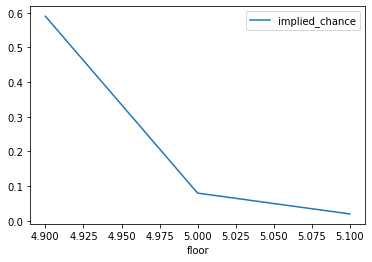

In [148]:
gas_prices['implied_chance']=gas_prices['last_price']/100
import matplotlib.pyplot as plt
%matplotlib inline
x="floor"
y="implied_chance"
gas_prices.plot(x="floor",y="implied_chance")

We've just plotted the implied chance of a the price of gas exceeding one of those values. What about the chance it falls in one of those buckets?  
$$\text{Price}_{June 20th}=\left\{\begin{array}{lr}
        [4.90, 5.00), & \text{Case A}\\
        [5.00, 5.10), & \text{Case B}\\
        [5.10, \infty), & \text{Case C}
    \end{array}
\right\}$$

We know that the price probabilities follow
$$\mathbb{P}(\text{Price}_{June 20th})=\left\{\begin{array}{lr}
        0.57, & \text{Price}>$4.90\\
        0.08, & \text{Price}>$5.00\\
        0.02, & \text{Price}>$5.10
    \end{array}
\right\}$$

Therefore the point wise probabilities follow
$$\mathbb{P}(\text{Price}_{June 20th})=\left\{\begin{array}{lr}
        0.41, & [-\infty, 4.90)\\
        0.49, & [4.90, 5.00)\\
        0.06, & [5.00, 5.10)\\
        0.02, & [5.10, \infty)
    \end{array}
\right\}$$

I let price go negative in case something like what happened with [West Texas Crude](https://www.marketwatch.com/story/oil-prices-went-negative-a-year-ago-heres-what-traders-have-learned-since-11618863839) ever happens again.

# Lets come up with a gas price estimate
The simplest estimate is what is called a Maximum-Likelihood or ML estimate. In this case the most likely outcome is between $\text{\$4.90}\space\text{and}\space\text{\$5.00}$
  
Another estimate is a weighted average. We can simply multiply the events by their probabilities and divide by the total probability. The $-\infty$ piece is troublesome so I'll leave it out.

In [153]:
implied_bucketed_chance=[]
for i,cumulative_p in enumerate(gas_prices['implied_chance']):
    implied_bucketed_chance.append(cumulative_p-sum(gas_prices['implied_chance'].iloc[i+1:]))
gas_prices['implied_bucketed_chance']=implied_bucketed_chance
print(gas_prices['implied_bucketed_chance'])
(gas_prices['floor']*gas_prices['implied_bucketed_chance']).sum()/gas_prices['implied_bucketed_chance'].sum()

id
54391c8c-edfb-4e7e-a502-61181d5dbd65    0.49
0b335454-4f3d-4be2-b6bf-67691bb0d5d2    0.06
ceadd865-9e6a-4f79-b9ce-bb1a843223f1    0.02
Name: implied_bucketed_chance, dtype: float64


4.917543859649122

# Improvements to our estimate 

In our estimate we naively assigned the maximum probability to lowest part of our range. Let's more appropriately weight things by using a function to create a probability density function.

<AxesSubplot:xlabel='floor'>

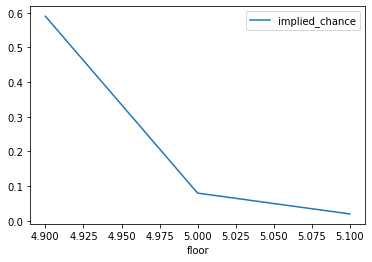

In [154]:
gas_prices.plot(x="floor", y="implied_chance")

We can choose many functions to fit to this. I'll use a "long tailed" power law distribution.

In [159]:
from scipy.optimize import curve_fit
import numpy as np
#https://en.wikipedia.org/wiki/Power_law#Finance
def func_powerlaw(x, m, c, c0):
    #Sub 4.9 since distribution is shifted by 4.9 to the right
    return c0 + np.subtract(x,4.9)**m * c
popt, pcov = curve_fit(func_powerlaw, gas_prices['floor'], gas_prices['implied_bucketed_chance'])
popt

C:\Users\minim\miniconda3\envs\kalshi_prediction_market\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 0.1283241 , -0.57781998,  0.49      ])

In [160]:
func_powerlaw([5],*popt)

array([0.06])

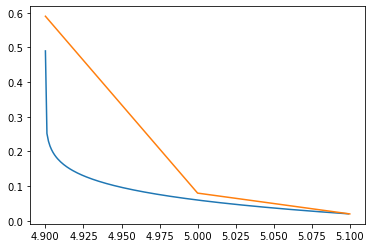

In [161]:
X=np.arange(4.9,5.1,0.001)
y_pred=func_powerlaw(X,*popt)
plt.plot(X,y_pred)
plt.plot(gas_prices['floor'],gas_prices['implied_chance'])

In [162]:
#Our "better" estimate
sum(X*y_pred)/sum(y_pred)

4.964229469406822

That curve is still a little bit ugly but now we have another estimate. It would be better if Kalshi had more options for this market, but they need to balance market interest with options. Thankfully markets like the S&P 500 end of day value have more "observations". We can also improve our estimate by:  
- training against past gas price curves to get a better sense of the distribution
- researching other probability distributions and improving our mathematics knowledge
- learning more about the gas price market itself  
  
I would start improving my stats and math. 